In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Cargar el dataset
dataset_path = r"C:\Users\manon\Downloads\preprocessed_data.csv"
datos = pd.read_csv(dataset_path)


In [2]:
print(datos.dtypes)
print(datos.shape[0])
print(datos.shape[1])
print(datos.isna().sum())

BookingID_Date                                          float64
Data_Ping_time                                          float64
Planned_ETA                                             float64
actual_eta                                              float64
Curr_lat                                                float64
Curr_lon                                                float64
ontime                                                    int64
delay                                                     int64
trip_start_date                                         float64
trip_end_date                                           float64
TRANSPORTATION_DISTANCE_IN_KM                           float64
Minimum_kms_to_be_covered_in_a_day                      float64
Org_latitude                                            float64
Org_longitude                                           float64
Des_latitude                                            float64
Des_longitude                           


Análisis de la variable categórica: delay
1    4342
0    2538
Name: delay, dtype: int64


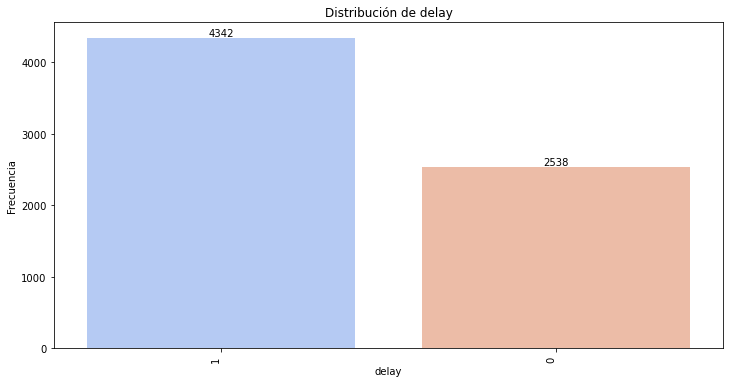

In [3]:
categorical_columns = [
    'delay'
]

for col in categorical_columns:
    print(f"\nAnálisis de la variable categórica: {col}")
    top_categories = datos[col].value_counts().nlargest(10)
    print(top_categories)
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(x=datos[col], order=top_categories.index, palette='coolwarm')
    plt.xticks(rotation=90, ha='right')
    plt.title(f'Distribución de delay')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.show()

In [4]:
datosnuevo = datos.drop('Minimum_kms_to_be_covered_in_a_day',axis = 1)

In [5]:
print(datosnuevo.shape[0])
print(datosnuevo.shape[1])
print(datosnuevo.isna().sum())

6880
30
BookingID_Date                                            0
Data_Ping_time                                            0
Planned_ETA                                               0
actual_eta                                                0
Curr_lat                                                953
Curr_lon                                                953
ontime                                                    0
delay                                                     0
trip_start_date                                           0
trip_end_date                                             0
TRANSPORTATION_DISTANCE_IN_KM                           712
Org_latitude                                              0
Org_longitude                                             0
Des_latitude                                              0
Des_longitude                                             0
vehicleType_32_FT_Multi-Axle_14MT_-_HCV                   0
vehicleType_32_FT_Single-Axle_7M

In [6]:
datosclas = datosnuevo.dropna()
print(datosclas.shape[0])
print(datosclas.shape[1])
print(datosclas.isna().sum())

5758
30
BookingID_Date                                          0
Data_Ping_time                                          0
Planned_ETA                                             0
actual_eta                                              0
Curr_lat                                                0
Curr_lon                                                0
ontime                                                  0
delay                                                   0
trip_start_date                                         0
trip_end_date                                           0
TRANSPORTATION_DISTANCE_IN_KM                           0
Org_latitude                                            0
Org_longitude                                           0
Des_latitude                                            0
Des_longitude                                           0
vehicleType_32_FT_Multi-Axle_14MT_-_HCV                 0
vehicleType_32_FT_Single-Axle_7MT_-_HCV                 0
vehicl


Top 10 características más importantes:
1. Planned_ETA (0.15284039898928994)
2. BookingID_Date (0.13445647820366088)
3. trip_start_date (0.1229623695840051)
4. actual_eta (0.10749811354529236)
5. trip_end_date (0.0856398599779755)
6. Data_Ping_time (0.08026446386794558)
7. TRANSPORTATION_DISTANCE_IN_KM (0.07454523764284676)
8. Des_latitude (0.041976393664023136)
9. Curr_lat (0.04141884142986146)
10. Curr_lon (0.032235752278944284)
Fitting 5 folds for each of 162 candidates, totalling 810 fits
['Planned_ETA', 'BookingID_Date', 'trip_start_date', 'actual_eta', 'trip_end_date', 'Data_Ping_time', 'TRANSPORTATION_DISTANCE_IN_KM', 'Des_latitude', 'Curr_lat', 'Curr_lon']
Mejores hiperparámetros: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Precisión: 0.9320594479830149
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       491
           1       0.93      0.93      0.93       451



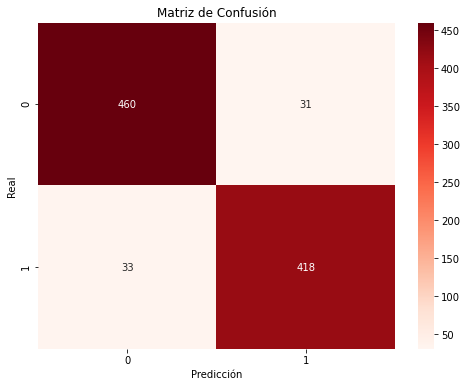

In [9]:
from imblearn.under_sampling import RandomUnderSampler


columnasfuera = ['ontime', 'customerID_DMREXCHEUX', 'customerID_FILEXCHE19', 
                 'customerID_LTLEXMUM40', 'customerID_OTROS']

datosclas = datosclas.drop(columns=[col for col in columnasfuera if col in datosclas.columns])


delay_col = 'delay'
datosclas[delay_col] = datosclas[delay_col].astype(int)

X = datosclas.drop(columns=[delay_col])
y = datosclas[delay_col]

#undersampling
undersampler = RandomUnderSampler(random_state=2803)
X_resampled, y_resampled = undersampler.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=2803)


model_rf_initial = RandomForestClassifier(n_estimators=100, random_state=2803)
model_rf_initial.fit(X_train, y_train)

# importancia de características
importancias = model_rf_initial.feature_importances_
indexs_clas = np.argsort(importancias)[::-1]

print("\nTop 10 características más importantes:")
for i in range(10):
    print(f"{i + 1}. {X_train.columns[indexs_clas[i]]} ({importancias[indexs_clas[i]]})")

# las 10 más importantes
num_caracteristicas_seleccionadas = 10
caracteristicas_seleccionadas = [X_train.columns[indexs_clas[i]] for i in range(num_caracteristicas_seleccionadas)]

X_train_seleccionadas = X_train[caracteristicas_seleccionadas]
X_test_seleccionadas = X_test[caracteristicas_seleccionadas]

# Búsqueda de hiperparámetros
parametros_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

model_rf_clas = RandomForestClassifier(random_state=2803)

grid_clas = GridSearchCV(estimator=model_rf_clas, param_grid=parametros_grid,
                         cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_clas.fit(X_train_seleccionadas, y_train)

# Mejor modelo con hiperparámetros optimizados
mejor_modelo_rf = grid_clas.best_estimator_

# Predicciones
y_pred_clas = mejor_modelo_rf.predict(X_test_seleccionadas)

# Evaluación
precision_clas = accuracy_score(y_test, y_pred_clas)
print(caracteristicas_seleccionadas)
print("Mejores hiperparámetros:", grid_clas.best_params_)
print("Precisión:", precision_clas)
print(classification_report(y_test, y_pred_clas))

# Matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_clas), annot=True, fmt="d", cmap="Reds")
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()